In [1]:
import os
os.chdir('../..')

In [2]:
from classes.helpers import *
import numpy as np
import json
import pandas as pd
from datetime import datetime
import seaborn as sns

import ast

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib
#matplotlib.rcParams['text.usetex'] = True
#matplotlib.rcParams['text.latex.unicode'] = True

data_folder = '../data/'

# For the Python notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

min_nbr_rats = 5

colors = {'H for HH': '#8b0000',
          'H for HL': '#c1253d',
          'H for HM': '#e75c59',
          'M for HM': '#fe9755',
          'M for MM': '#ffd700',
          'M for LM': '#9dcd75',
          'L for LM': '#6cb482',
          'L for HL': '#419a83',
          'L for LL': '#008080',
          'ba': (232/255,164/255,29/255), 
          'rb': (0/255,152/255,205/255)}

labels = {'ba': 'BeerAdvocate', 'rb': 'RateBeer'}

notext = {'ba': 'nan', 'rb': ''}

data_folder = '../data/'
save_folder = '../figures/all/5-paper/'

# Lost Rhino plots

In [46]:
with open(data_folder + 'plot/lost_rhino.json', 'r') as infile:
    ratings = json.load(infile)

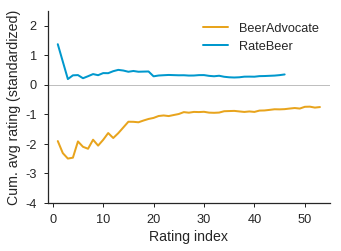

In [47]:
plt.figure(figsize=(5, 3.75), frameon=False)

sns.set_context("paper")
sns.set(font_scale = 1.28)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})
ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.plot([-10, 55], [0, 0], 'grey', linewidth=0.5)

for key in ['ba', 'rb']:
    
    rats = ratings[key]

    rmean = np.cumsum(rats)/np.array(range(1, len(rats)+1))

    ax.plot(list(range(1, len(rmean)+1)), rmean, color=colors[key], label=labels[key], linewidth=2)

plt.ylabel('Cum. avg rating (standardized)')
plt.xlabel('Rating index')

plt.xlim([-1, 55])
plt.ylim([-4, 2.5])
plt.yticks(list(range(-4, 3)), list(range(-4, 3)))

leg = plt.legend()
leg.get_frame().set_linewidth(0.0)
plt.tight_layout()

plt.savefig(save_folder + 'timeseries_avg_zscore_example.pdf', bbox_inches='tight')

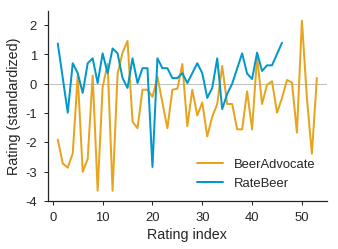

In [48]:
plt.figure(figsize=(5, 3.5), frameon=False)

sns.set_context("paper")
sns.set(font_scale = 1.3)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})


ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.plot([-10, 55], [0, 0], 'grey', linewidth=0.5)

for key in ['ba', 'rb']:

    rats = ratings[key]

    rmean = np.cumsum(rats)/np.array(range(1, len(rats)+1))

    ax.plot(list(range(1, len(rmean)+1)), rats, color=colors[key], label=labels[key], linewidth=2)
    
plt.xlim([-1, 55])
plt.ylim([-4, 2.5])
plt.yticks(list(range(-4, 3)), list(range(-4, 3)))


plt.ylabel('Rating (standardized)')
plt.xlabel('Rating index')
leg = plt.legend()
leg.get_frame().set_linewidth(0.0)

plt.savefig(save_folder + 'timeseries_zscore_example.pdf', bbox_inches='tight')

# All ratings

In [9]:
with open(data_folder + 'plot/all_ratings.json', 'r') as infile:
    ratings = json.load(infile)

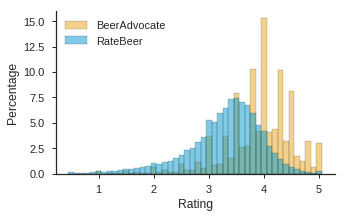

In [15]:
plt.figure(figsize=(5, 3), frameon=False)

sns.set_context("paper")
sns.set(font_scale = 1.1)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})

ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

nbr_bins = 45

bin_edges = {'ba': None, 'rb': None}
hist = {'ba': None, 'rb': None}

for key in bin_edges.keys():
    a, bin_edges[key] = np.histogram(ratings[key], range=(0.5, 5), bins=nbr_bins)
    hist[key], a = np.histogram(ratings[key], range=(0.5, 5), bins=nbr_bins+1)
    hist[key] = hist[key]/np.sum(hist[key])*100

for key in hist.keys():
    width = bin_edges[key][1] - bin_edges[key][0]
    plt.bar(bin_edges[key], hist[key], width = width, 
            facecolor=colors[key], edgecolor='k', alpha=0.5, 
            label=labels[key])
    
plt.ylabel('Percentage')
plt.xlabel('Rating')
leg = plt.legend()
leg.get_frame().set_linewidth(0.0)

plt.savefig(save_folder + 'ratings_all_beers.pdf', bbox_inches='tight')

# Yearly ratings

In [16]:
with open(data_folder + 'plot/avg_year.json', 'r') as infile:
    avg = json.load(infile)

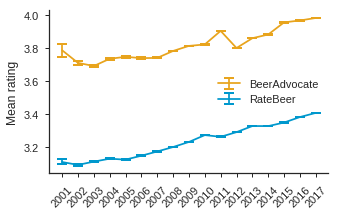

In [17]:
years = list(range(2001, 2018))
x = np.array(range(len(years)))

plt.figure(figsize=(5, 3), frameon=False)

sns.set_context("paper")
sns.set(font_scale = 1.1)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})


ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for key in avg.keys():
    vals = np.array(avg[key]['mean'])
    high = np.array(avg[key]['high'])
    low = np.array(avg[key]['low'])
    conf_int = np.array([high-vals, vals-low])

    
    plt.errorbar(x, vals , yerr=conf_int, 
                 color=colors[key], fmt='-', 
                 label=labels[key], 
                 capsize=5, capthick=2)
    
plt.xticks(list(range(len(years))), years, rotation=45)
plt.ylabel('Mean rating')
leg = plt.legend()
leg.get_frame().set_linewidth(0.0)

plt.savefig(save_folder + 'avg_rating_per_year.pdf', bbox_inches='tight')

In [18]:
with open(data_folder + 'plot/std_year.json', 'r') as infile:
    std = json.load(infile)

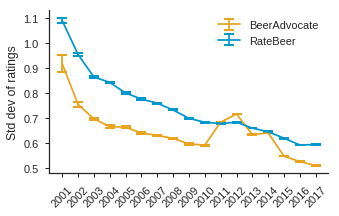

In [19]:
years = list(range(2001, 2018))
x = np.array(range(len(years)))

plt.figure(figsize=(5, 3), frameon=False)

sns.set_context("paper")
sns.set(font_scale = 1.1)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})


ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for key in std.keys():
    vals = np.array(std[key]['mean'])
    high = np.array(std[key]['high'])
    low = np.array(std[key]['low'])
    conf_int = np.array([high-vals, vals-low])

    
    plt.errorbar(x, vals , yerr=conf_int, 
                 color=colors[key], fmt='-', 
                 label=labels[key], 
                 capsize=5, capthick=2)
    
plt.xticks(list(range(len(years))), years, rotation=45)
plt.ylabel('Std dev of ratings')
leg = plt.legend()
leg.get_frame().set_linewidth(0.0)

plt.savefig(save_folder + 'std_rating_per_year.pdf', bbox_inches='tight')

# Histogram z-score matched

In [49]:
with open(data_folder + 'plot/zscore_matched.json', 'r') as infile:
    zscore = json.load(infile)

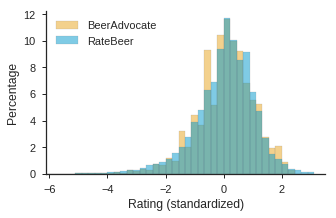

In [50]:
years = list(range(2001, 2018))
x = np.array(range(len(years)))

plt.figure(figsize=(5, 3), frameon=False)

sns.set_context("paper")
sns.set(font_scale = 1.1)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})


ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

nbr_bins = 45

bin_edges = {'ba': None, 'rb': None}
hist = {'ba': None, 'rb': None}

for key in bin_edges.keys():
    a, bin_edges[key] = np.histogram(zscore[key], range=(-7, 3), bins=nbr_bins)
    hist[key], a = np.histogram(zscore[key], range=(-7, 3), bins=nbr_bins+1)
    hist[key] = hist[key]/np.sum(hist[key])*100
    
for key in hist.keys():
    width = bin_edges[key][1] - bin_edges[key][0]
    plt.bar(bin_edges[key], hist[key], width = width, 
            facecolor=colors[key], edgecolor='grey', alpha=0.5, 
            label=labels[key])
    
plt.ylabel('Percentage')
plt.xlabel('Rating (standardized)')

plt.xlim([-6.1, 3.5])

leg = plt.legend()
leg.get_frame().set_linewidth(0.0)

plt.savefig(save_folder + 'zscore_matched_beers.pdf', bbox_inches='tight')

# Hexagon plot

In [71]:
# Load files    
df = pd.read_csv(data_folder + 'matched/beers.csv', header=[0,1])

# params
min_nbr_ratings = 5
df = df[(df['ba']['nbr_ratings'] >= min_nbr_ratings) & (df['rb']['nbr_ratings'] >= min_nbr_ratings)]
df.index = range(len(df))

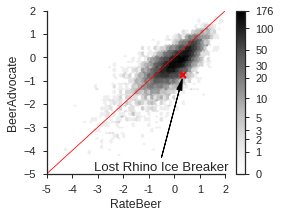

In [124]:
idx = df[df['ba']['beer_id'] == 78599].index[0]

ticks = [0, 1, 2, 3, 5, 10, 20, 30, 50, 100, 176]
log_ticks = []
for t in ticks:
    log_ticks.append(np.log10(t+1))
    
key = 'zscore'

plt.figure(figsize=(4, 3), frameon=False)

sns.set_context("paper")
sns.set(font_scale = 1.1)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})


ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

hb = ax.hexbin(df['rb'][key], df['ba'][key], gridsize=50, bins='log', cmap='Greys')
ax.plot([-5, 2], [-5, 2], 'red', linewidth=0.8)

ax.axis([-5, 2, -5, 2])
plt.xticks(list(range(-5, 3)), list(range(-5, 3)))

plt.xlabel('RateBeer')
plt.ylabel('BeerAdvocate')

cb = plt.colorbar(hb, ax=ax, ticks=log_ticks)
cb.ax.set_yticklabels(ticks)
ax.set_facecolor('white')
row = df.loc[idx]
name = row['rb']['beer_name']
x = row['rb'][key]
y = row['ba'][key]

plt.plot([x], [y], 'x', color='r', mew=2, ms=6)

plt.arrow(-0.5, -4.3, x+0.35, 2.9, linewidth=1, head_width=0.2, head_length=0.5, fc='k', ec='k')

plt.text(-0.5, -5, name, horizontalalignment='center', verticalalignment='bottom')

plt.savefig(save_folder + 'hexhist_zscores_example.pdf', bbox_inches='tight')

# Sanity checks matching

In [217]:
min_nbr_ratings = 5
matched = pd.read_csv(data_folder + 'matched/beers.csv', header=[0,1])
matched = matched[(matched['ba']['nbr_ratings'] >= min_nbr_ratings) & (matched['rb']['nbr_ratings'] >= min_nbr_ratings)]

df = {}

df['ba'] = pd.read_csv(data_folder + 'ba/beers.csv')
df['ba'] = df['ba'][df['ba']['nbr_ratings'] >= min_nbr_ratings]

df['rb'] = pd.read_csv(data_folder + 'rb/beers.csv')
df['rb'] = df['rb'][df['rb']['nbr_ratings'] >= min_nbr_ratings]

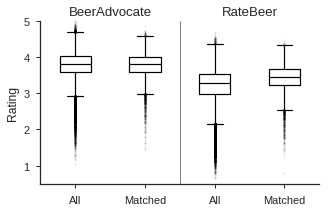

In [218]:
plt.figure(figsize=(5, 3), frameon=False)

sns.set_context("paper")
sns.set(font_scale = 1.1)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})

ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

data = [df['ba']['avg_computed'], matched['ba']['avg_computed'], df['rb']['avg_computed'], matched['rb']['avg_computed']]

boxes = ax.boxplot(data, sym='k.')
plt.ylabel('Rating')
plt.plot([2.5, 2.5], [0.5, 5], 'k', linewidth=0.5)
plt.xticks([1, 2, 3, 4], ['All', 'Matched', 'All', 'Matched'])

for b in boxes:
    for l in boxes[b]:
        l.set_linewidth(1.2)
        l.set_color('k')
        if b == 'fliers':
            l.set_alpha(0.1)
            l.set_marker('o')
            l.set_markersize(2)
        
plt.ylim([0.5, 5])

ax.text(1.5, 5.4, 'BeerAdvocate', horizontalalignment='center', verticalalignment='top')
ax.text(3.5, 5.4, 'RateBeer', horizontalalignment='center', verticalalignment='top')

plt.savefig(save_folder + 'boxplots_ratings.pdf', bbox_inches='tight')

In [244]:
matched = pd.read_csv(data_folder + 'matched/beers.csv', header=[0,1])

df = {}

df['ba'] = pd.read_csv(data_folder + 'ba/beers.csv')
df['rb'] = pd.read_csv(data_folder + 'rb/beers.csv')

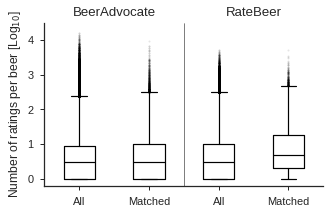

In [245]:
data = []
for key in df.keys():   
    arr1 = np.array(df[key]['nbr_ratings'])
    arr1 = arr1[arr1>0]
    
    arr2 = np.array(matched[key]['nbr_ratings'])
    arr2 = arr2[arr2>0]
    
    data.append(np.log10(arr1))
    data.append(np.log10(arr2))
plt.figure(figsize=(5, 3), frameon=False)

sns.set_context("paper")
sns.set(font_scale = 1.1)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})

ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

boxes = ax.boxplot(data, sym='k.')
plt.ylabel('Number of ratings per beer [Log$_{10}$]')
plt.plot([2.5, 2.5], [-0.2, 4.5], 'k', linewidth=0.5)
plt.xticks([1, 2, 3, 4], ['All', 'Matched', 'All', 'Matched'])

for b in boxes:
    for l in boxes[b]:
        l.set_linewidth(1.2)
        l.set_color('k')
        if b == 'fliers':
            l.set_alpha(0.1)
            l.set_marker('o')
            l.set_markersize(2)
        
plt.ylim([-0.2, 4.5])

ax.text(1.5, 4.95, 'BeerAdvocate', horizontalalignment='center', verticalalignment='top')
ax.text(3.5, 4.95, 'RateBeer', horizontalalignment='center', verticalalignment='top')

plt.savefig(save_folder + 'boxplots_nbr_ratings.pdf', bbox_inches='tight')    

In [246]:
df = {}

df['ba'] = pd.read_csv(data_folder + 'ba/breweries.csv')
df['rb'] = pd.read_csv(data_folder + 'rb/breweries.csv')

matched = pd.read_csv(data_folder + 'matched/breweries.csv', header=[0,1])

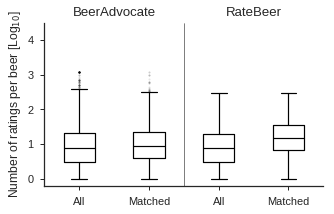

In [247]:
data = []
for key in df.keys():   
    arr1 = np.array(df[key]['nbr_beers'])
    arr1 = arr1[arr1>0]
    
    arr2 = np.array(matched[key]['nbr_beers'])
    arr2 = arr2[arr2>0]
    
    data.append(np.log10(arr1))
    data.append(np.log10(arr2))

plt.figure(figsize=(5, 3), frameon=False)

sns.set_context("paper")
sns.set(font_scale = 1.1)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})

ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

boxes = ax.boxplot(data, sym='k.')
plt.ylabel('Number of ratings per beer [Log$_{10}$]')
plt.plot([2.5, 2.5], [-0.2, 4.5], 'k', linewidth=0.5)
plt.xticks([1, 2, 3, 4], ['All', 'Matched', 'All', 'Matched'])

for b in boxes:
    for l in boxes[b]:
        l.set_linewidth(1.2)
        l.set_color('k')
        if b == 'fliers':
            l.set_alpha(0.1)
            l.set_marker('o')
            l.set_markersize(2)
        
plt.ylim([-0.2, 4.5])

ax.text(1.5, 4.95, 'BeerAdvocate', horizontalalignment='center', verticalalignment='top')
ax.text(3.5, 4.95, 'RateBeer', horizontalalignment='center', verticalalignment='top')

plt.savefig(save_folder + 'boxplots_nbr_beers_breweries.pdf', bbox_inches='tight')    

# Herding

In [33]:
with open(data_folder + 'plot/herding.json', 'r') as infile:
    vals = json.load(infile)

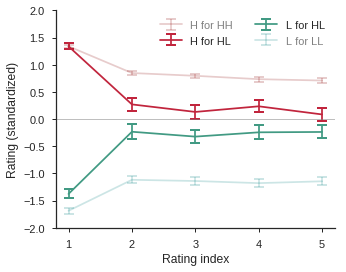

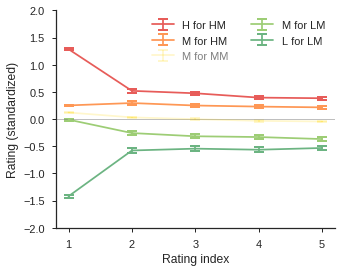

In [37]:
for type_class in ['extreme', 'medium']:

    plt.figure(figsize=(5, 4), frameon=False)

    sns.set_context("paper")
    sns.set(font_scale = 1.1)
    sns.set_style("white", {
        "font.family": "sans-serif",
        "font.serif": ['Helvetica'],
        "font.scale": 2
    })
    sns.set_style("ticks", {"xtick.major.size": 4,
                            "ytick.major.size": 4})
    
    ax = plt.subplot(111)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    if type_class == 'extreme':
        classes_to_plot = ['H for HH','H for HL', 'L for HL', 'L for LL']

        vals_class = [0, 3]

    elif type_class == 'medium':  
        classes_to_plot = ['H for HM', 'M for HM', 'M for MM', 'M for LM', 'L for LM']

        vals_class = [2]

    i = 0
    for class_ in classes_to_plot:

        vals_tmp = vals[class_]

        avg = np.array(vals_tmp['avg'])
        high = np.array(vals_tmp['high'])
        low = np.array(vals_tmp['low'])

        if i in vals_class:
            alpha = 0.2
        else:
            alpha = 1

        plt.errorbar(range(1, min_nbr_rats + 1), avg, yerr=[high-avg, avg-low],
                    fmt='-', ms=4, capsize=5, capthick=2, c=colors[class_], 
                     alpha=alpha, label = class_)

        #avg = avg[1:]
        #high = high[1:]
        #low = low[1:]

        if i in vals_class:
            alpha = 0.1
        else:
            alpha = 0.7

        #plt.plot(range(2, min_nbr_rats + 1), avg, color=colors[class_], alpha=alpha)
        #plt.plot(range(2, min_nbr_rats + 1), high, '--', color=colors[class_], alpha=alpha, linewidth=0.5)
        #plt.plot(range(2, min_nbr_rats + 1), low, '--', color=colors[class_], alpha=alpha, linewidth=0.5)

        #if i in vals_class:
        #    alpha = 0.2
        #else:
        #    alpha = 0.7
        #plt.fill_between(range(2, min_nbr_rats + 1), low, high, color=colors[class_], alpha=alpha, label = class_) 

        i+=1

    l = plt.legend(ncol=2)
    plt.xticks(list(range(1,min_nbr_rats + 1)))

    i = 0
    for text in l.get_texts():
        if i in vals_class:
            text.set_color('gray')
        i+=1
        
    plt.plot([-2, min_nbr_rats + 2], [0, 0], color='grey', linewidth=0.5)

    plt.ylim([-2, 2])
    plt.ylabel('Rating (standardized)')

    plt.xlim([0.8, min_nbr_rats + 0.2])

    plt.xlabel('Rating index')
    
    plt.savefig(save_folder + 'herding_{}_{}.pdf'.format(type_class, 'global'), bbox_inches='tight')

# Herding LTA

In [38]:
with open(data_folder + 'plot/herding_lta.json', 'r') as infile:
    vals_lta = json.load(infile)
    
classes_names = ['H for HH',
 'H for HL',
 'L for HL',
 'L for LL',
 'H for HM',
 'M for HM',
 'M for MM',
 'M for LM',
 'L for LM']

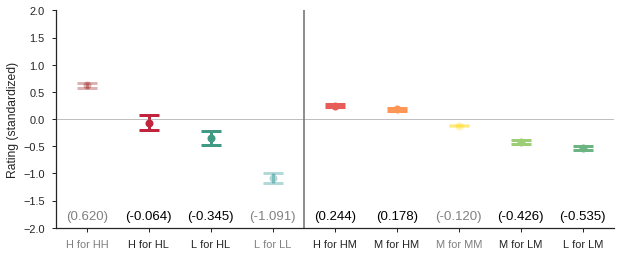

In [70]:
plt.figure(figsize=(10, 4), frameon=False)

sns.set_context("paper")
sns.set(font_scale = 1.1)
sns.set_style("white", {
    "font.family": "sans-serif",
    "font.serif": ['Helvetica'],
    "font.scale": 2
})
sns.set_style("ticks", {"xtick.major.size": 4,
                        "ytick.major.size": 4})

ax = plt.subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

vals_class = [0, 3, 6]

avg = np.array(vals_lta['avg'])
low = np.array(vals_lta['low'])
high = np.array(vals_lta['high'])

text_ticks = []
for i in range(len(avg)):

    if i in vals_class:
        alpha = 0.3
    else:
        alpha = 1

    plt.errorbar(i, avg[i], yerr=[[high[i]-avg[i]], [avg[i]-low[i]]], 
                fmt='o', markersize=8, capsize=10, capthick=3, lw=3,
                 c=colors[classes_names[i]], alpha=alpha)

    text_ticks.append(classes_names[i])# + '\n({:.3f})\n'.format(avg[i]))

plt.xlim([-0.5, len(text_ticks)-0.5])
plt.xticks(list(range(len(text_ticks))), text_ticks)

i=0
for xtick in ax.xaxis.get_ticklabels():

    if i in vals_class:
        xtick.set(color='gray')

    i+=1
    
for i in range(len(avg)):
    
    c = 'k'
    if i in vals_class:
        c='gray'
    
    ax.text(i, -1.9, '({:.3f})'.format(avg[i]), 
    horizontalalignment='center', verticalalignment='bottom', color=c)


plt.plot([-0.5, len(text_ticks)-0.5], [0, 0], color='grey', linewidth=0.5)

plt.plot([3.5, 3.5], [-2, 2], 'grey')

plt.ylim([-2, 2])
plt.ylabel('Rating (standardized)')
plt.xlabel('I love beers!', color='w')

plt.savefig(save_folder + 'lta_herding_{}.pdf'.format('global'), bbox_inches='tight')